## Applying Pytorch to achieve regression
#### 03/08/2020

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Initiate data
#### There should be $y = w[2]*x^2+w[1]*x+w[0]$
#### So tensor w ought to requires auto grad

In [2]:
x = torch.tensor([1.0,2.0,3.0])
y = torch.tensor([3.0,2.0,1.0])
w = torch.tensor([0.0,0.0,0.0])
w.requires_grad = True

loss_list = []

In [3]:
def forward(x):
    return w[0]+w[1]*x+w[2]*x*x

def loss(y,y_pred):
    return (y_pred-y)**2

Start Training...
tensor([ 3.9921e+00, -9.9147e-01, -1.9080e-03])


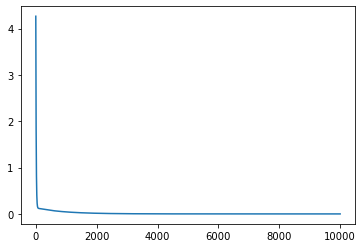

In [4]:
print('Start Training...')
lr = 0.01

running_loss = 0
for e in range(10000):
    for i in range(len(x)):
        y_pred = forward(x[i])
        l = loss(y[i],y_pred)
        l.backward()
        w.data -= w.grad.data * lr
        running_loss += l.item()
        
        w.grad.data.zero_()
    #print('epoch NO.{}\tloss = {}\t\t{}'.format(e,running_loss/len(x),w.data))
    loss_list.append(running_loss/3)
    running_loss = 0
    
plt.plot(loss_list)
print(w.data)